In [7]:
include("rslds_model.jl")
include("data_generators.jl")
using Plots

In [8]:
hyperparameters = RSLDSHyperparameters(
    a_w = 0.01,
    b_w = 0.01,
    Ψ_w = 10.0*diageye(2), # n-1  
    Ψ_R = inv(R),
    ν_R = 4.0,
    α = ones(2,2), # n
    C = c
) 

RSLDSHyperparameters{Float64}(0.01, 0.01, [10.0 0.0; 0.0 10.0], [1.0 0.0; 0.0 1.0], 4.0, [1.0 1.0; 1.0 1.0], [0.6 -0.02; -0.02 0.3])

In [9]:
rslds_result = fit_rslds(y, 2, 2, 2; iterations = 150, hyperparameters = hyperparameters, progress = true)


Inference results:
  Posteriors       | available for (ϕ, w, P, A, s, H, Λ, B, u, x)
  Free Energy:     | Real[3.2597e5, 75461.2, 2853.87, 2099.3, 2059.12, 2066.19, 2081.98, 2099.14, 2115.15, 2128.96  …  1726.37, 1727.15, 1727.91, 1728.66, 1729.39, 1730.12, 1730.83, 1731.53, 1732.22, 1732.9]


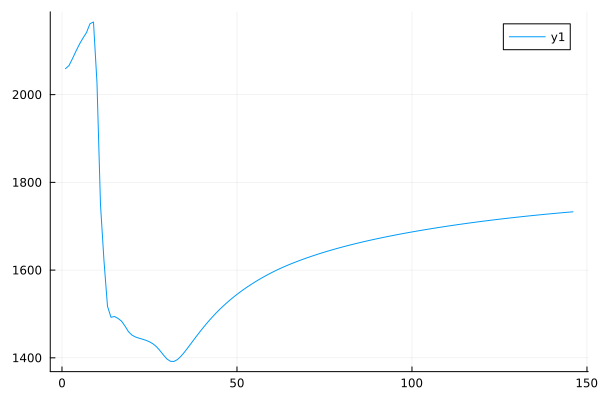

In [10]:
plot(rslds_result.free_energy[5:end])

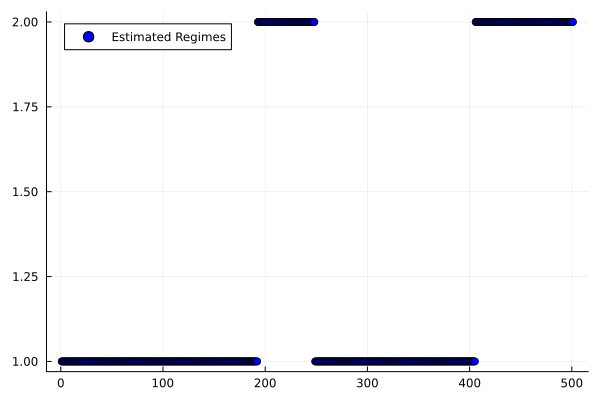

In [11]:
switching_state_posterior = rslds_result.posteriors[:s][end];
states = states_to_categorical(switching_state_posterior);
scatter(states, label="Estimated Regimes", color="blue", linewidth=2)

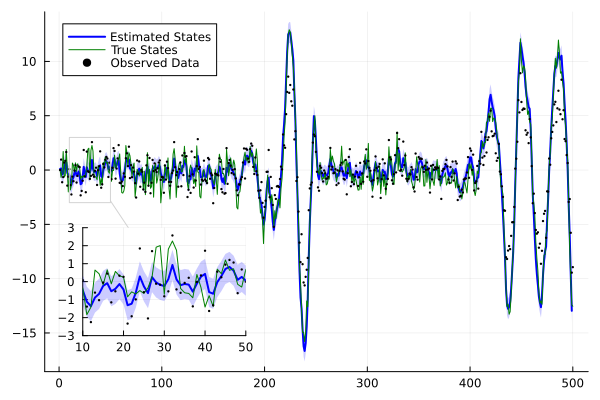

In [12]:
continuous_state_posterior = rslds_result.posteriors[:x][end];
index = 1
from = 1
to = 500

m_continuous = getindex.(mean.(continuous_state_posterior), index);
var_continuous = getindex.(var.(continuous_state_posterior), index);
plot(m_continuous[from+1:to], ribbon=sqrt.(var_continuous[from+1:to]), label="Estimated States", color="blue",fillalpha=0.2, linewidth=2)
plot!(getindex.(x,index)[from:to], label="True States", color="green", linewidth=1)
scatter!(getindex.(y,index)[from:to], label="Observed Data", color="black", ms=1.3)
lens!([10,50],[-3, 3],inset = (1, bbox(0.07, 0.6, 0.3, 0.3)), )


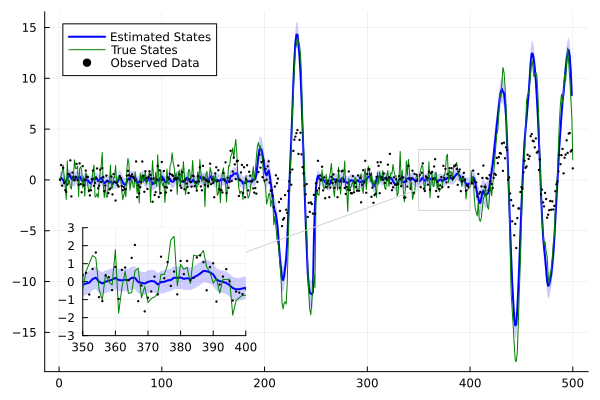

In [13]:
index = 2
m_continuous = getindex.(mean.(continuous_state_posterior), index);
var_continuous = getindex.(var.(continuous_state_posterior), index);
plot(m_continuous[from+1:to], ribbon=sqrt.(var_continuous[from+1:to]), label="Estimated States", color="blue",fillalpha=0.2, linewidth=2)
plot!(getindex.(x,index)[from:to], label="True States", color="green", linewidth=1)
scatter!(getindex.(y,index)[from:to], label="Observed Data", color="black", ms=1.3)
lens!([350,400],[-3, 3],inset = (1, bbox(0.07, 0.6, 0.3, 0.3)), )


In [14]:
println("Estimated continuous transition matrices:")
println("----------------------------------------")
for i in 1:length(rslds_result.posteriors[:H][end])
    println("Matrix $i:")
    println(reshape(mean(rslds_result.posteriors[:H][end][i]), 2, 2))
    println()
end

In [15]:
println("Estimated discrete transition matrix for HMM layer:")
println("----------------------------------------")
println(mean(rslds_result.posteriors[:P][end]))

In [16]:
mean(rslds_result.posteriors[:ϕ][end])


2-element Vector{Float64}:
  0.0005080411616543439
 -0.0027185425121671156